# Used Car Price Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##sns.set_palette("GnBu_d")
##sns.set_style('whitegrid')

### Importing  Dataset

In [82]:
car_data = pd.read_csv("dataset.csv")

In [83]:
car_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Index

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

In [84]:
car_data = car_data.iloc[:, 1:]

## Preprocessing

In [85]:
car_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [86]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [87]:
make_train = car_data["Name"].str.split(" ", expand = True)
make_test = car_data["Name"].str.split(" ", expand = True)

In [88]:
car_data["Manufacturer"] = make_train[0]
car_data["Manufacturer"] = make_test[0]

## Drop features that are not required to build our model

In [89]:
# In Model column There are three hundred and twelve unique models.
# That's something really hard to implement and a regression that would mean more than 1876 dummies,
df = car_data.drop(labels='Name', axis=1)
df = df.drop(labels='Location', axis=1)

## Check for any missing value in data set and treat it

In [90]:
df.isna().sum()

,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36
Seats,42
New_Price,5195


In [91]:
df = df.drop(labels='New_Price', axis=1)

In [92]:
df.isna().sum()

,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36
Seats,42
Price,0


## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [93]:
mile = df["Mileage"].str.split(" ", expand = True)

df["Mileage"] = pd.to_numeric(mile[0], errors = 'coerce')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6017 non-null   float64
 6   Engine             5983 non-null   object 
 7   Power              5983 non-null   object 
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  Manufacturer       6019 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 517.4+ KB


Let's check for missing values.

In [95]:
print(sum(df["Mileage"].isnull()))

2


There is two missing values . I'll replace the missing values with the mean value of the column based on the data.

In [96]:
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6019 non-null   float64
 6   Engine             5983 non-null   object 
 7   Power              5983 non-null   object 
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  Manufacturer       6019 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 517.4+ KB


## Engine, Power and Seats

The Engine values are defined in CC so I need to remove CC from the data. Similarly, Power has bhp, so I'll remove bhp from it. Also, as there are missing values in Engine, Power and Seats, I'll again replace them with the mean

In [98]:

cc_train = df["Engine"].str.split(" ", expand = True)

df["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')


bhp_train = df["Power"].str.split(" ", expand = True)

df["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')


In [99]:
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)

df["Power"].fillna(df["Power"].astype("float64").mean(), inplace = True)

df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)

## Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [100]:
curr_time = datetime.datetime.now()
df['Year'] = df['Year'].apply(lambda x : curr_time.year - x)

In [101]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,14,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,9,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,13,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,12,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,11,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6019 non-null   float64
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Price              6019 non-null   float64
 10  Manufacturer       6019 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 517.4+ KB


## Data exploration

### Exploring the PDFs

The probability distribution will show us how that variable is distributed

Text(0.5, 1.0, 'Car Price Distribution Plot')

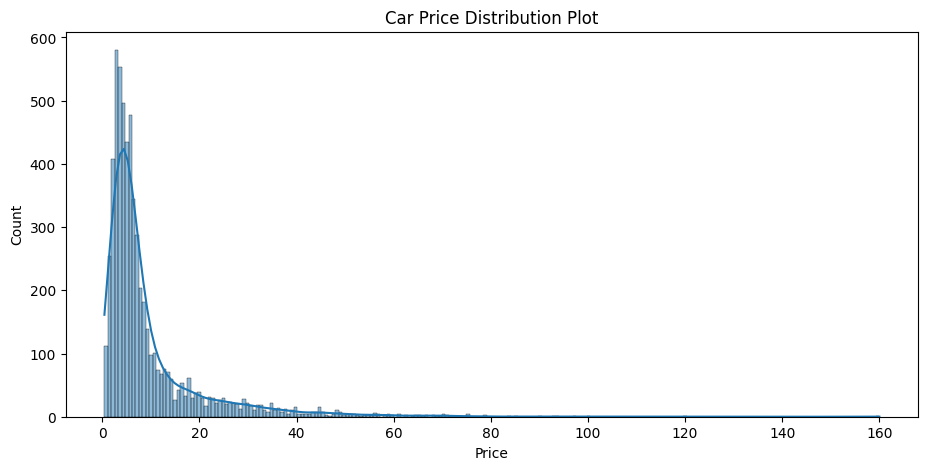

In [105]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.histplot(df['Price'] , kde = True)
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'EngineV Distribution Plot')

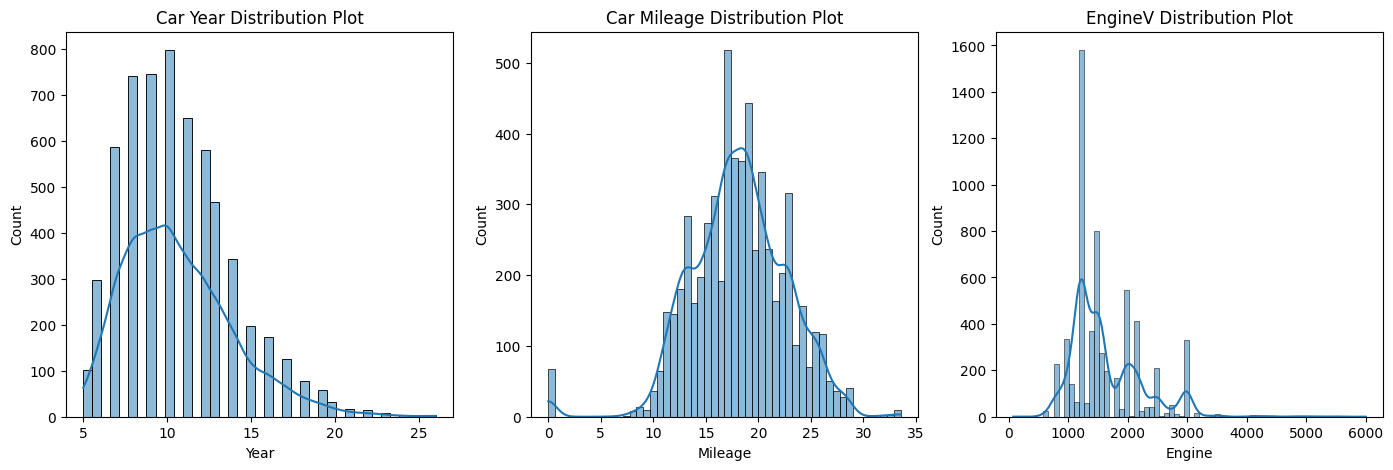

In [106]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.histplot(df['Year'], kde = True)
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.histplot(df['Mileage'] , kde = True)
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.histplot(df['Engine'] , kde = True)
plt.title('EngineV Distribution Plot')

Text(0.5, 1.0, 'Car Seats Distribution Plot')

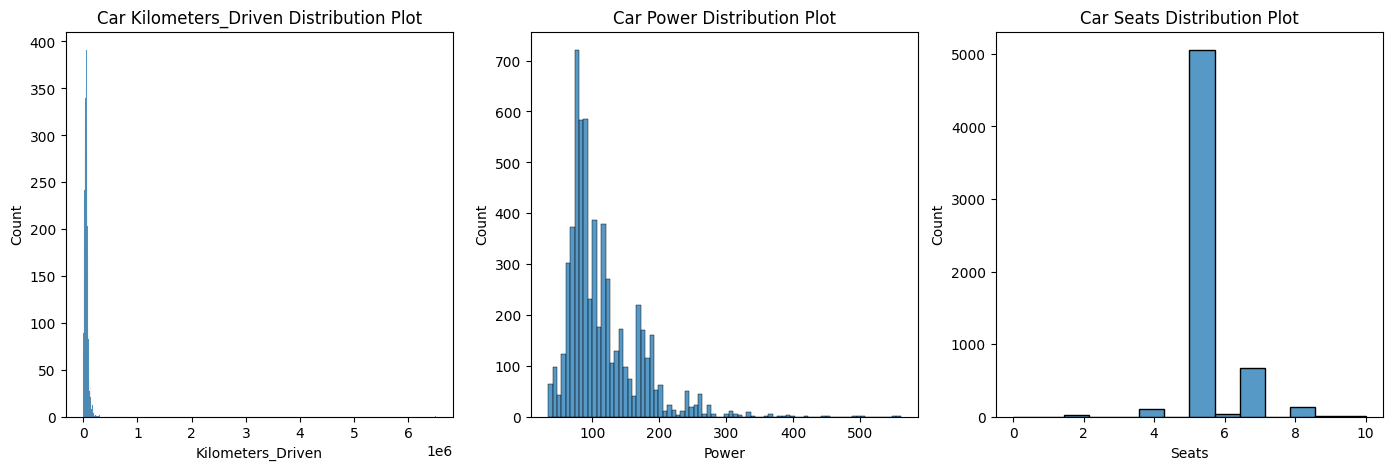

In [107]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.histplot(df['Kilometers_Driven'])
plt.title('Car Kilometers_Driven Distribution Plot')

plt.subplot(1,3,2)
sns.histplot(df['Power'])
plt.title('Car Power Distribution Plot')

plt.subplot(1,3,3)
sns.histplot(df['Seats'])
plt.title('Car Seats Distribution Plot')


## Dealing with outliers

### Price column

In [108]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df[df['Price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

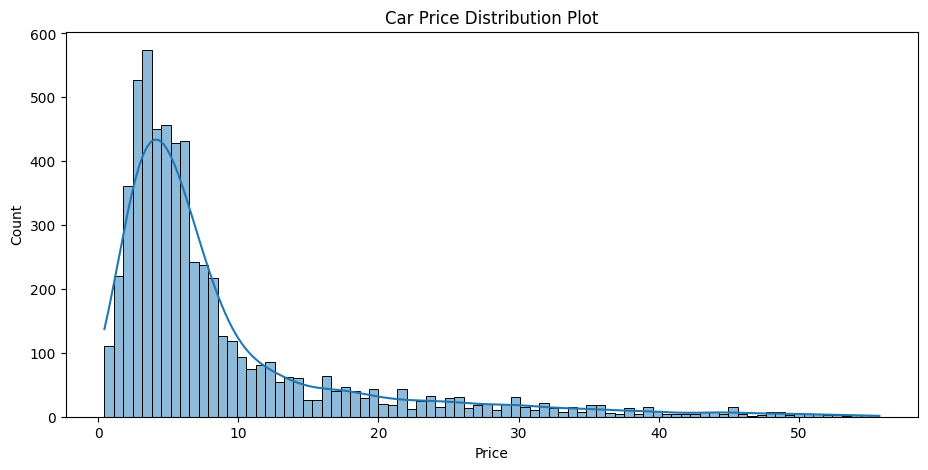

In [109]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.histplot(data_1['Price'],kde=True)
plt.title('Car Price Distribution Plot')

#### However, there are much fewer outliers

Mileage Column

Text(0.5, 1.0, 'Car Mileage Distribution Plot')

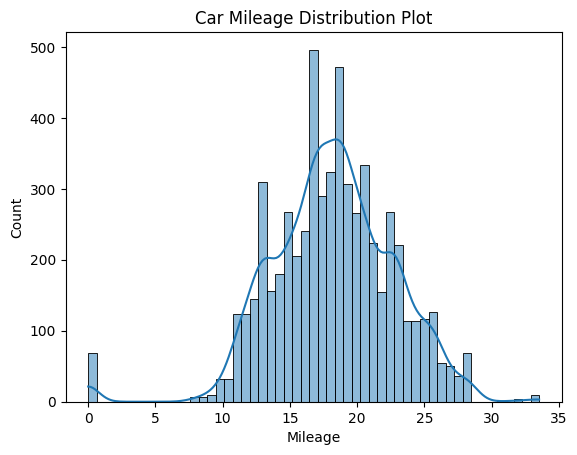

In [110]:
#Now we can treat the other numerical variables outlier in a similar way
sns.histplot(data_1['Mileage'],kde = True)
plt.title('Car Mileage Distribution Plot')
# this plot already looks kind of normal

Year Column

<Axes: xlabel='Year', ylabel='Count'>

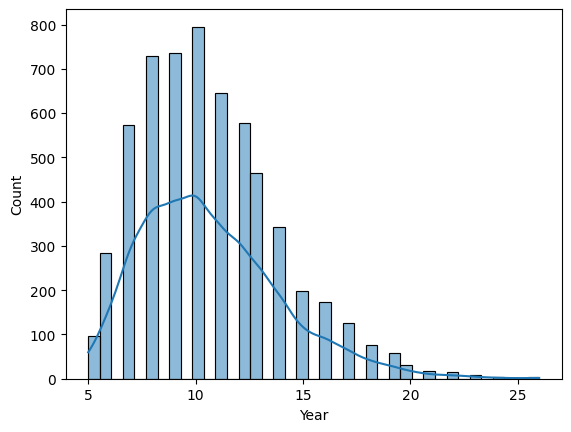

In [112]:
# In this scenario outliers are on the low end
sns.histplot(data_1['Year'],kde = True)
# this plot also looks like normal

Engine Column

Text(0.5, 1.0, 'Engine Distribution Plot')

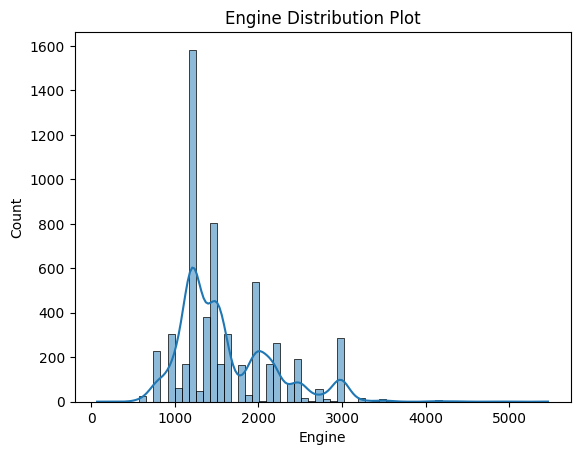

In [114]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.histplot(data_1['Engine'] ,kde = True)
plt.title('Engine Distribution Plot')

In [115]:
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider

q = data_1['Engine'].quantile(0.995)
data_2 = data_1[data_1['Engine']<q]

<Axes: xlabel='Engine', ylabel='Count'>

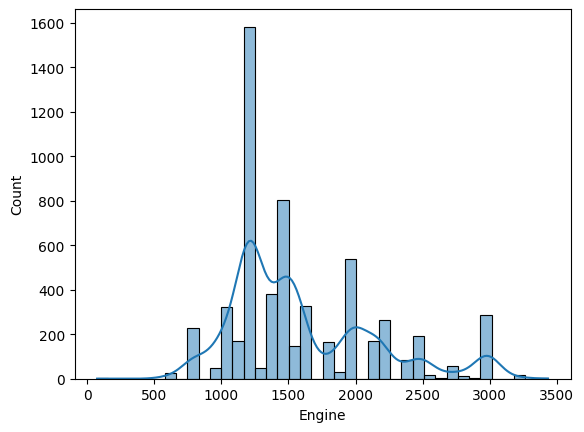

In [116]:
# now its looks kind of normal
sns.histplot(data_2['Engine'] , kde = True)

Kilometers_Driven Column

Text(0.5, 1.0, 'Car Kilometers_Driven Distribution Plot')

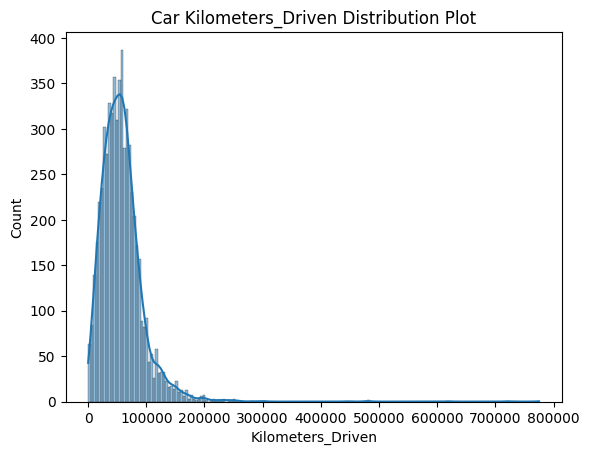

In [117]:
#Now we can treat the other numerical variables outlier in a similar way
sns.histplot(data_2['Kilometers_Driven'] , kde = True)
plt.title('Car Kilometers_Driven Distribution Plot')

In [118]:
q = data_2['Kilometers_Driven'].quantile(0.995)
data_3 = data_2[data_2['Kilometers_Driven']<q]

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

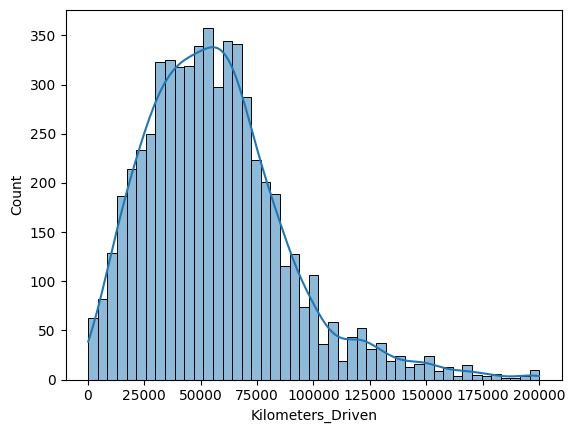

In [119]:
sns.histplot(data_3['Kilometers_Driven'] , kde = True)

Power Column

Text(0.5, 1.0, 'Car Power Distribution Plot')

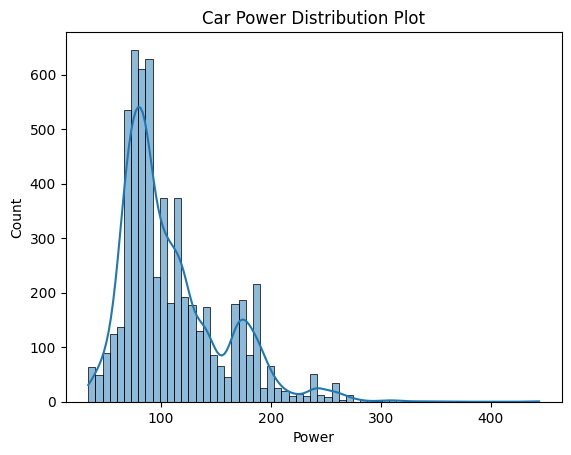

In [120]:
sns.histplot(data_3['Power'] , kde = True)
plt.title('Car Power Distribution Plot')

In [121]:
q = data_3['Power'].quantile(0.99)
data_4 = data_3[data_3['Power']<q]

<Axes: xlabel='Power', ylabel='Count'>

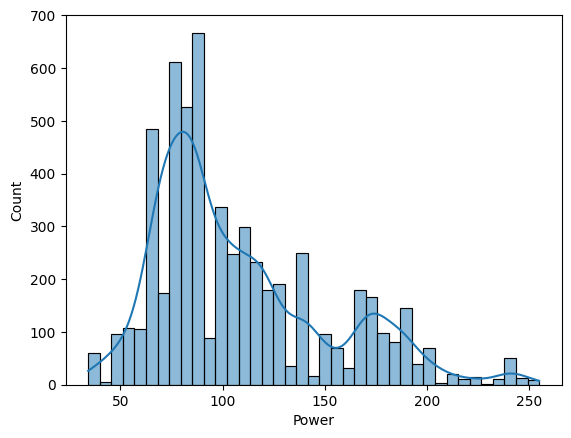

In [122]:
sns.histplot(data_4['Power'] , kde = True)

Seats Column

Text(0.5, 1.0, 'Car Power Distribution Plot')

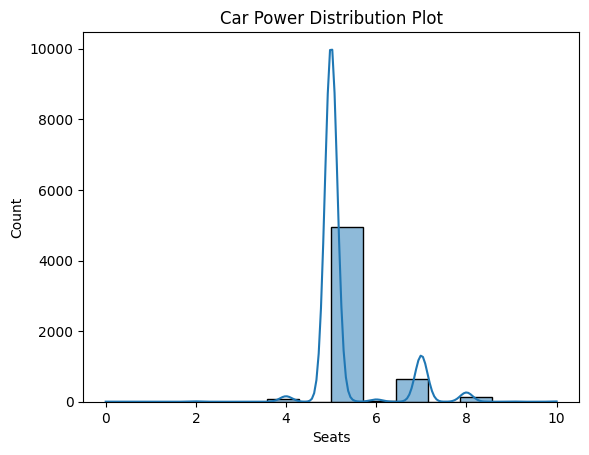

In [123]:
sns.histplot(data_4['Seats'] , kde = True)
plt.title('Car Power Distribution Plot')

In [124]:
q = data_4['Seats'].quantile(0.99)
data_5 = data_4[data_4['Seats']<q]

<Axes: xlabel='Seats', ylabel='Count'>

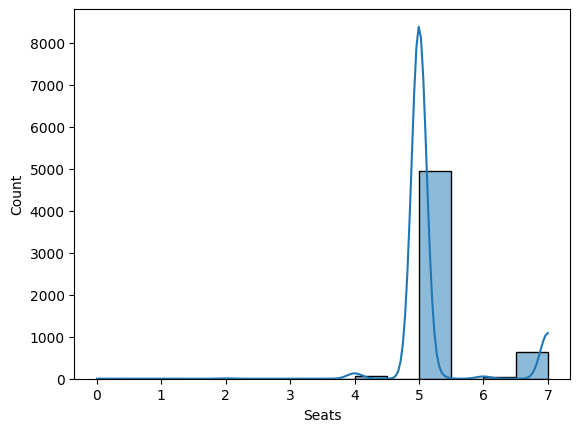

In [125]:
sns.histplot(data_5['Seats'] , kde = True)

In [126]:
# Reset index
cleaned_data = data_5.reset_index(drop=True)

In [127]:
# once again checking discriptive statistics
cleaned_data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000
mean,10.600879,56145.125308,18.412545,1557.295422,108.182639,5.214008,8.447960
std,3.238854,31246.059332,4.501849,517.592523,43.298113,0.657403,8.502561
min,5.000000,171.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,8.000000,34000.000000,15.740000,1197.000000,75.000000,5.000000,3.450000
50%,10.000000,52975.500000,18.500000,1461.000000,91.100000,5.000000,5.500000
75%,12.000000,72000.000000,21.210000,1956.000000,130.000000,5.000000,9.250000
max,26.000000,200000.000000,33.540000,3436.000000,255.000000,7.000000,55.760000


## lets check the linearity using a scatter plot

Text(0.5, 1.0, 'Price and Seats')

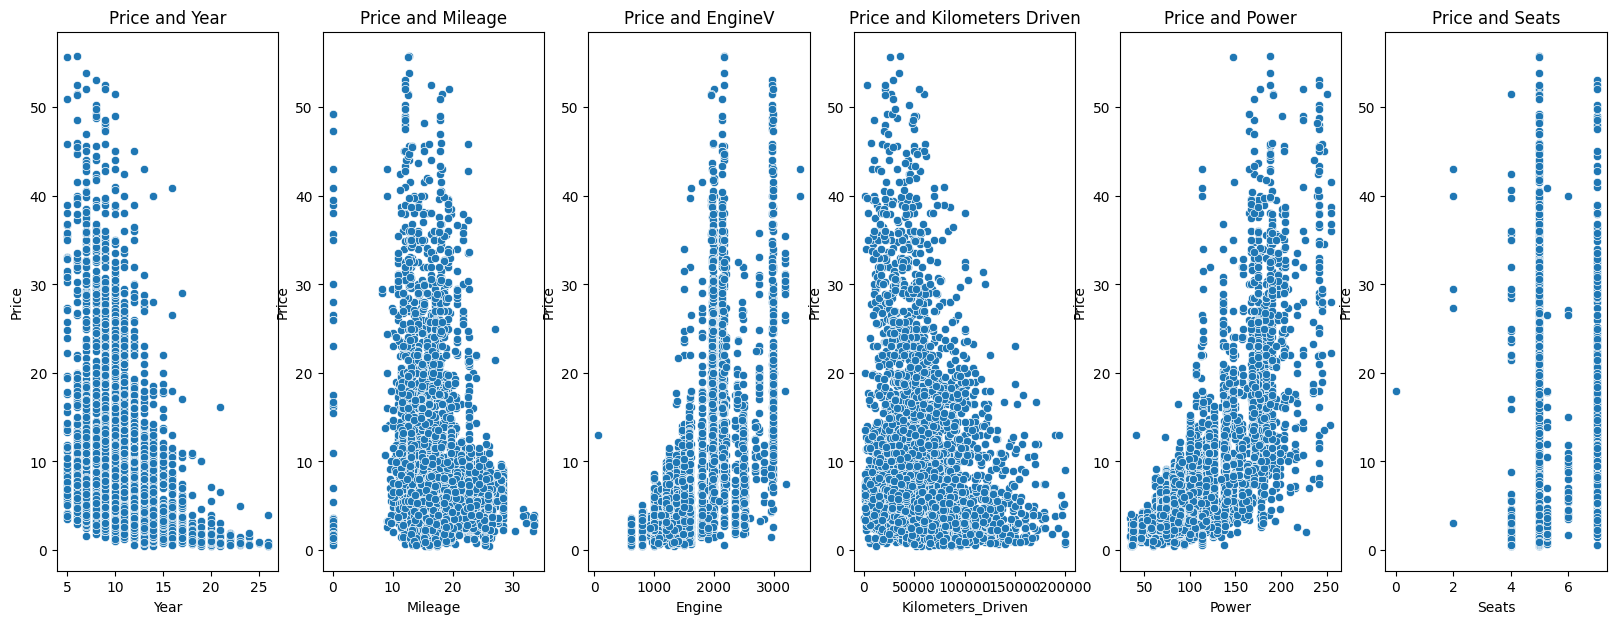

In [128]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,6,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,6,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Mileage',y='Price',data=cleaned_data)

plt.subplot(1,6,3)
sns.scatterplot(y='Price',x='Engine',data=cleaned_data)
plt.title("Price and EngineV")

plt.subplot(1,6,4)
sns.scatterplot(y='Price',x='Kilometers_Driven',data=cleaned_data)
plt.title("Price and Kilometers Driven")

plt.subplot(1,6,5)
sns.scatterplot(y='Price',x='Power',data=cleaned_data)
plt.title("Price and Power")

plt.subplot(1,6,6)
sns.scatterplot(y='Price',x='Seats',data=cleaned_data)
plt.title("Price and Seats")

we can spot patterns but definitely not perfect linear once. we know we should not run a linear regression in this case. we should first transform one or more variables recall the ditribution plot of price to all these plot are pointing us towards the idea that price is not normally distributed.

And from there its relationships with the other rather normally distributed features is not linear.

<Axes: xlabel='Price', ylabel='Count'>

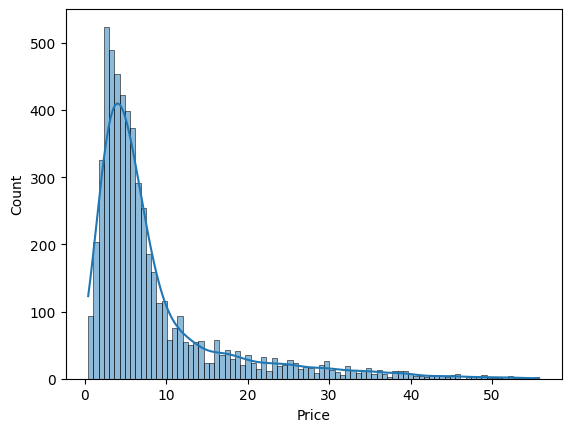

In [129]:
#recall the distribution plot of price
sns.histplot(cleaned_data['Price'] , kde = True)

See The patterns are quite exponentials in this condition log transformation is a common way to deal with this issue. log transformation is especially useful when facing exponential scatter plots like we do now.

## Let's transform 'Price' with a log transformation

In [130]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()


#log_mileage = np.log(cleaned_data['Mileage'])

# Then we add it to our data frame
#cleaned_data['log_Mileage'] = log_mileage
#cleaned_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,log_price
0,14,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0.559616
1,9,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2.525729
2,13,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1.504077
3,12,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1.791759
4,11,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2.875822


Text(0.5, 1.0, 'Price and Seats')

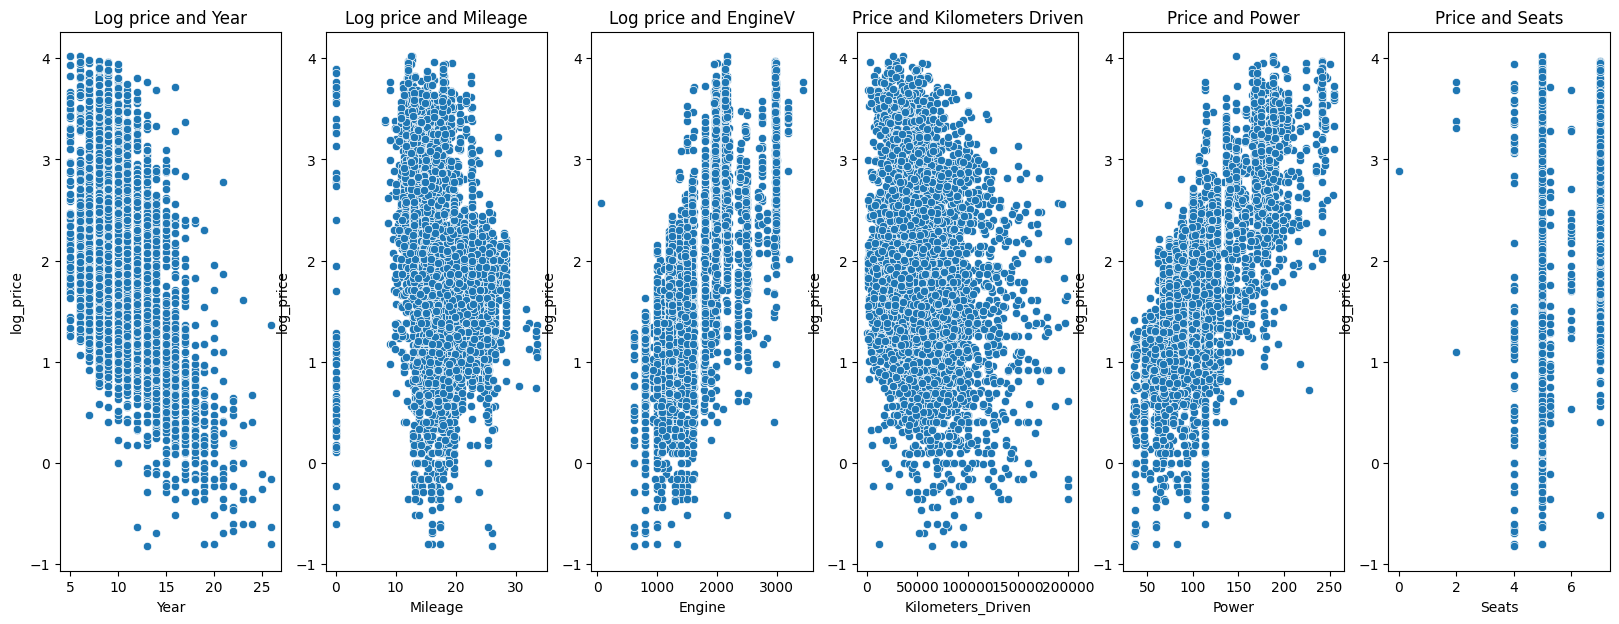

In [131]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,6,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,6,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,6,3)
sns.scatterplot(y='log_price',x='Engine',data=cleaned_data)
plt.title("Log price and EngineV")

plt.subplot(1,6,4)
sns.scatterplot(y='log_price',x='Kilometers_Driven',data=cleaned_data)
plt.title("Price and Kilometers Driven")

plt.subplot(1,6,5)
sns.scatterplot(y='log_price',x='Power',data=cleaned_data)
plt.title("Price and Power")

plt.subplot(1,6,6)
sns.scatterplot(y='log_price',x='Seats',data=cleaned_data)
plt.title("Price and Seats")


# The relationships show a clear linear relationship
# This is some good linear regression material

In [132]:
# Since we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['Price'],axis=1)

## Checking Multicollinearity Using VIF

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cleaned_data[['Mileage','Year','Engine','Seats','Power','Kilometers_Driven']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,15.205805,Mileage
1,12.898492,Year
2,54.805380,Engine
3,52.675639,Seats
4,27.648726,Power
5,6.146877,Kilometers_Driven


Fixing Multicollinearity:

In [134]:
# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('Engine',axis=1)

In [135]:
data_no_multicolinearity.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Manufacturer,log_price
0,14,72000,CNG,Manual,First,26.60,58.16,5.0,Maruti,0.559616
1,9,41000,Diesel,Manual,First,19.67,126.20,5.0,Hyundai,2.525729
2,13,46000,Petrol,Manual,First,18.20,88.70,5.0,Honda,1.504077
3,12,87000,Diesel,Manual,First,20.77,88.76,7.0,Maruti,1.791759
4,11,40670,Diesel,Automatic,Second,15.20,140.80,5.0,Audi,2.875822


In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_multicolinearity[['Mileage','Year','Seats','Power','Kilometers_Driven']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,12.980045,Mileage
1,12.740432,Year
2,33.769072,Seats
3,8.647011,Power
4,5.820071,Kilometers_Driven


In [137]:
data_no_multicolinearity = data_no_multicolinearity.drop('Seats',axis=1)

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_multicolinearity[['Mileage','Year','Power','Kilometers_Driven']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.056837,Mileage
1,11.381428,Year
2,5.069239,Power
3,5.733319,Kilometers_Driven


In [139]:
#data_no_multicolinearity = data_no_multicolinearity.drop('Mileage',axis=1)

In [140]:
variables = data_no_multicolinearity[['Year','Power','Kilometers_Driven']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,8.663018,Year
1,4.715200,Power
2,5.729636,Kilometers_Driven


## Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

In [141]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])

# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Power                0.748317
Transmission         0.591571
Year                 0.528683
Fuel_Type            0.423367
Mileage              0.219201
Kilometers_Driven    0.211130
Owner_Type           0.201462
Manufacturer         0.075221
dtype: float64


<Axes: >

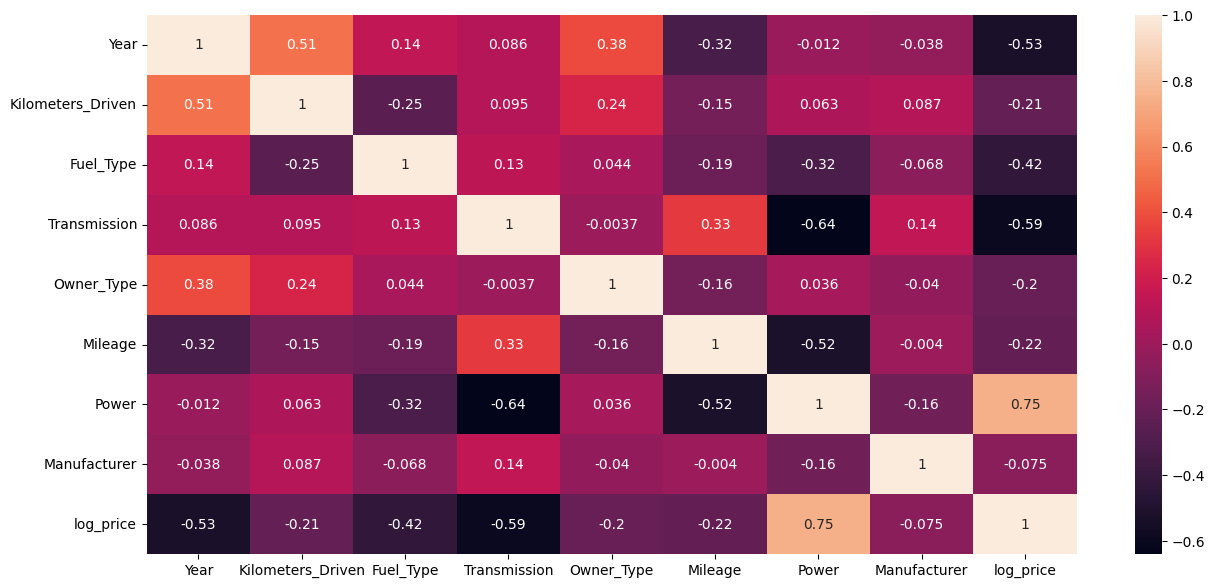

In [147]:
plt.figure(figsize=[15,7])
sns.heatmap(temp_data.corr(), annot=True)

### Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [148]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

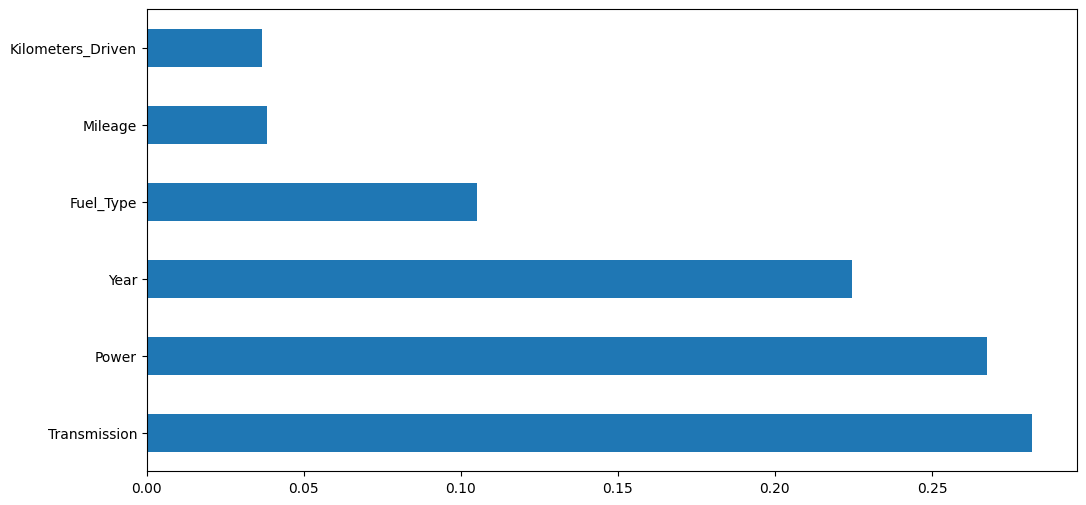

In [149]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [150]:
print(feat_importances.sort_values(ascending=False))

Transmission         0.281986
Power                0.267471
Year                 0.224502
Fuel_Type            0.105057
Mileage              0.038135
Kilometers_Driven    0.036746
Manufacturer         0.034064
Owner_Type           0.012039
dtype: float64


## Categorical Features

In [151]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [152]:
data_with_dummies.head()

,Year,Kilometers_Driven,Mileage,Power,log_price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,14,72000,26.60,58.16,0.559616,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,9,41000,19.67,126.20,2.525729,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,13,46000,18.20,88.70,1.504077,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,12,87000,20.77,88.76,1.791759,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,11,40670,15.20,140.80,2.875822,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Development

### Declaring dependent and independent variable

In [153]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']


### Feature Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage']])

StandardScaler()

In [155]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage'])

In [156]:
input_scaled2 =scaled_data.join(x.drop(['Mileage'],axis=1))

## Training and Testing Data

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=365)
x

,Year,Kilometers_Driven,Mileage,Power,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,14,72000,26.60,58.16,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,9,41000,19.67,126.20,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,13,46000,18.20,88.70,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,12,87000,20.77,88.76,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,11,40670,15.20,140.80,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,9,70602,25.80,98.60,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5686,10,27365,28.40,74.00,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5687,9,100000,24.40,71.00,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5688,11,46000,18.90,67.10,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
r2=[]
rmse=[]

## Linear Regression Model

In [159]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
rmserror = np.sqrt(mean_squared_error(y_test,y_pred_lr))

print("R_squared :",r_squared)
print("RMSE :",rmserror)

r2.append(r_squared)
rmse.append(rmserror)

R_squared : 0.906299940719644
RMSE : 0.2536863576796248


## Random Forest Regressor Model

In [160]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmserror = np.sqrt(mean_squared_error(y_test,y_pred_rf))


print("R_squared :",r_squared)
print("RMSE :",rmserror)


r2.append(r_squared)
rmse.append(rmserror)

R_squared : 0.9185722707104563
RMSE : 0.23649030551285136


## Decision Tree Regressor Model

In [161]:
from sklearn.tree import DecisionTreeRegressor
dtr =DecisionTreeRegressor()

# Training Model
dtr.fit(x_train,y_train)

# Model Summary
y_pred_rf = dtr.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmserror = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print("R_squared :",r_squared)
print("RMSE :",rmserror)

r2.append(r_squared)
rmse.append(rmserror)

R_squared : 0.8660855959832815
RMSE : 0.30327794361387833


## Gradient Boost Regressor Model

In [162]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmserror = np.sqrt(mean_squared_error(y_test,y_pred_gbt))

print("R_squared :",r_squared)
print("RMSE :",rmserror)

r2.append(r_squared)
rmse.append(rmserror)

R_squared : 0.9189402636978863
RMSE : 0.23595531993901972


## Ridge Regressor Model

In [163]:
from sklearn.linear_model import Ridge

params = {"alpha": [.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,30]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True)

In [164]:
clf.best_params_

{'alpha': 1}

In [165]:
clf.fit(x_train,y_train)
predicts=clf.predict(x_test)
prediction=pd.DataFrame(predicts)
R_2=r2_score(y_test,predicts)

# cv_mean = -cross_val_score(model,x_train,y_train,cv=cv, scoring='neg_mean_squared_error').mean()



r_squared = r2_score(y_test,predicts)
rmserror = np.sqrt(mean_squared_error(y_test,predicts))

print("R_squared :",r_squared)
print("RMSE :",rmserror)

r2.append(r_squared)
rmse.append(rmserror)

R_squared : 0.9063518061507868
RMSE : 0.25361613694719665


## Lasso Regressor Model

In [166]:
from sklearn.linear_model import Lasso

params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
lasreg = Lasso()
clf_lasso = GridSearchCV(estimator=lasreg, param_grid=params, cv=5, return_train_score=True)
clf_lasso.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.902e+01, tolerance: 2.169e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.723e+01, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.526e+01, tolerance: 2.160e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True)

In [167]:
clf_lasso.best_params_

{'alpha': 1e-05}

In [168]:
clf_lasso.fit(x_train,y_train)
predicts1=clf_lasso.predict(x_test)
prediction1=pd.DataFrame(predicts)
R_2=r2_score(y_test,predicts1)

# cv_mean = -cross_val_score(model,x_train,y_train,cv=cv, scoring='neg_mean_squared_error').mean()



r_squared = r2_score(y_test,predicts1)
rmserror = np.sqrt(mean_squared_error(y_test,predicts1))

print("R_squared :",r_squared)
print("RMSE :",rmserror)


r2.append(r_squared)
rmse.append(rmserror)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.902e+01, tolerance: 2.169e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.723e+01, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.526e+01, tolerance: 2.160e

R_squared : 0.9066184574148085
RMSE : 0.253254809786335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+02, tolerance: 2.701e-01
  model = cd_fast.enet_coordinate_descent(


## Comparing ALL Results

In [169]:
Results = pd.DataFrame({
    'Model':['Linear Regression','Random Forest','Decision Tree','Gradient Boost','Ridge','Lasso',],
    'r^2':r2,
    'rmse':rmse
})

In [170]:
Results

,Model,r^2,rmse
0,Linear Regression,0.906300,0.253686
1,Random Forest,0.918572,0.236490
2,Decision Tree,0.866086,0.303278
3,Gradient Boost,0.918940,0.235955
4,Ridge,0.906352,0.253616
5,Lasso,0.906618,0.253255
